In [1]:
import pandas as pd
import numpy as np

In [2]:
dados = pd.read_csv('dados/brain_stroke.csv')
dados.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
dados.shape

(4981, 11)

In [4]:
dados.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

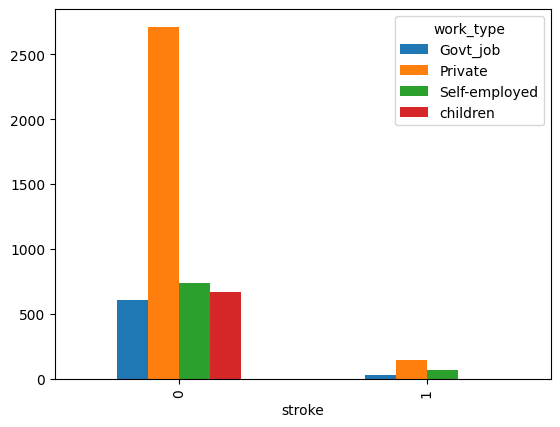

In [5]:
import matplotlib.pyplot as plt
strokes_by= dados.groupby(['stroke', 'work_type']).size().unstack()

ax = strokes_by.plot(kind='bar')

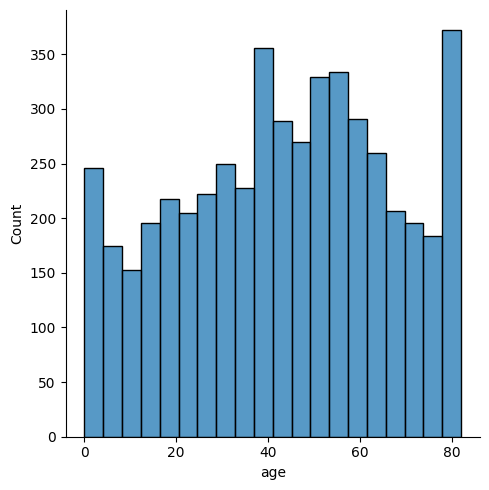

In [6]:
import seaborn as sns
sns.displot(data=dados, x='age')

In [7]:
dados['smoking_status'].value_counts()

smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: count, dtype: int64

In [8]:
dados['Residence_type'].value_counts()

Residence_type
Urban    2532
Rural    2449
Name: count, dtype: int64

In [9]:
dados['work_type'].value_counts()

work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: count, dtype: int64

In [10]:
dados['ever_married'].value_counts()

ever_married
Yes    3280
No     1701
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)
colunas_ohe = ohe.fit_transform(dados[['smoking_status', 'work_type', 'Residence_type', 'ever_married', 'gender']]).toarray()

dados2 = dados.drop(columns=['smoking_status', 'work_type', 'Residence_type', 'ever_married', 'gender'], axis=1)
dados_dummies = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns= ohe.get_feature_names_out(['smoking_status', 'work_type',
                                                                                                 'Residence_type', 'ever_married', 'gender']))], axis=1)
dados_dummies.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,gender_Female,gender_Male
0,67.0,0,1,228.69,36.6,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1
1,80.0,0,1,105.92,32.5,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1
2,49.0,0,0,171.23,34.4,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0
3,79.0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1


<Axes: xlabel='stroke', ylabel='count'>

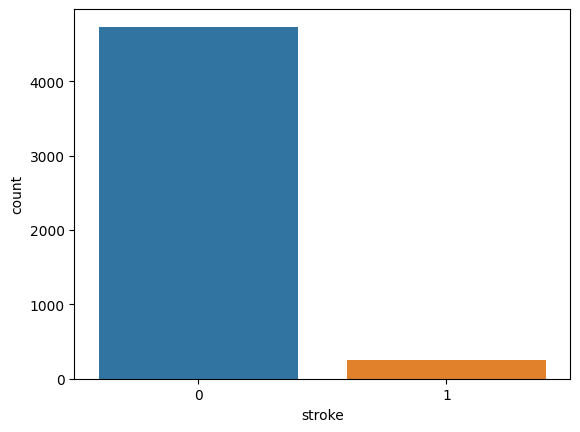

In [12]:
sns.countplot(x='stroke', data=dados_dummies)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados_padron = scaler.fit_transform(dados_dummies.drop(columns=['stroke'], axis=1))
dados_padron = pd.DataFrame(dados_padron, columns=['age','hypertension','heart_disease','avg_glucose_level','bmi','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes','work_type_Govt_job','work_type_Private','work_type_Self employed','work_type_children','Residence_type_Rural','Residence_type_Urban','ever_married_No','ever_married_Yes', 'gender_Female', 'gender_Male'])
dados_trat = pd.concat([dados_dummies['stroke'], dados_padron], axis=1)
dados_trat.head()

,stroke,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Private,work_type_Self employed,work_type_children,Residence_type_Rural,Residence_type_Urban,ever_married_No,ever_married_Yes,gender_Female,gender_Male
0,1,1.040584,-0.326186,4.136753,2.723411,1.193238,-0.656438,2.178325,-0.764717,-0.429584,-0.385344,0.861167,-0.438728,-0.395248,-0.983473,0.983473,-0.720137,0.720137,-1.183909,1.183909
1,1,1.614270,-0.326186,4.136753,-0.000523,0.589390,-0.656438,-0.459068,1.307674,-0.429584,-0.385344,0.861167,-0.438728,-0.395248,1.016804,-1.016804,-0.720137,0.720137,-1.183909,1.183909
2,1,0.246250,-0.326186,-0.241735,1.448529,0.869222,-0.656438,-0.459068,-0.764717,2.327835,-0.385344,0.861167,-0.438728,-0.395248,-0.983473,0.983473,-0.720137,0.720137,0.844660,-0.844660
3,1,1.570141,3.065738,-0.241735,1.512650,-0.662492,-0.656438,-0.459068,1.307674,-0.429584,-0.385344,-1.161215,2.279314,-0.395248,1.016804,-1.016804,-0.720137,0.720137,0.844660,-0.844660
4,1,1.658400,-0.326186,-0.241735,1.780895,0.073909,-0.656438,2.178325,-0.764717,-0.429584,-0.385344,0.861167,-0.438728,-0.395248,-0.983473,0.983473,-0.720137,0.720137,-1.183909,1.183909


In [14]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

SEED = 301
np.random.seed(SEED)

x = dados_trat.drop(columns=['stroke'])
y = dados_trat['stroke']

cv= KFold(n_splits=5, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x, y, cv = cv, return_train_score=False)
                    
def imprime_resultados(results):
    media = results['test_score'].mean() * 100
    desvio = results['test_score'].std() * 100
    print("Accuracy médio %.2f" % media)
    print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))
                    
imprime_resultados(results)

Accuracy médio 94.96
Intervalo [94.12, 95.80]


In [16]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
    SEED = 301
    np.random.seed(SEED)

    cv = KFold(n_splits = 5, shuffle=True)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
    results = cross_validate(modelo, x, y, cv = cv, return_train_score=True)
    fit_time = results["fit_time"].mean()
    score_time = results["score_time"].mean()
    train_score = results['train_score'].mean() * 100
    test_score = results['test_score'].mean() * 100

    tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
    return tabela

def busca():
    resultados = []
    for max_depth in range(1,33):
        for min_samples_leaf in [32, 64, 128, 256]:
            for min_samples_split in [32, 64, 128, 256]:
                tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
                resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf", "min_samples_split", "train", "test", 
                                                    "fit_time", "score_time"])
    return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,95.021087,95.021188,0.005270,0.002200
1,1,32,64,95.021087,95.021188,0.004609,0.001208
2,1,32,128,95.021087,95.021188,0.004199,0.001399
3,1,32,256,95.021087,95.021188,0.006997,0.002220
4,1,64,32,95.021087,95.021188,0.004198,0.001201


In [17]:
def busca():
    resultados = []
    for max_depth in range(1, 33):
        for min_samples_leaf in [128, 192, 256, 512]:
            tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
            resultados.append(tabela)
    resultados = pd.DataFrame(resultados, columns= ['max_depth', 'min_samples_leaf', 'train', 'test'])
    return resultados

resultados = busca()
resultados.head()

TypeError: roda_arvore_de_decisao() missing 1 required positional argument: 'min_samples_split'

In [ ]:
corr = resultados.corr()
sns.heatmap(resultados.corr())

In [ ]:
resultados.sort_values('test', ascending=False).head(10)